In [1]:
import numpy as np
from tensorflow import keras
model = keras.models.load_model('./cricketers/')

In [2]:
from keras_preprocessing import image
from matplotlib import pyplot as plt

def pred(path):
    img = image.load_img(path, target_size=(224,224))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x=x/255
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images)
    players = ['bhuvneshwar_kumar','dinesh_karthik','hardik_pandya','jasprit_bumrah','k._l._rahul','kedar_jadhav','kuldeep_yadav','mohammed_shami','ms_dhoni','ravindra_jadeja','rohit_sharma','shikhar_dhawan','vijay_shankar','virat_kohli','yuzvendra_chahal']
    print(players[list(classes[0]).index(max(list(classes[0])))])
    
def pred2(img):
#     plt.imshow(img)
#     plt.show()
    x = image.img_to_array(img)
    x=x/255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images)
    players = ['bhuvneshwar_kumar','dinesh_karthik','hardik_pandya','jasprit_bumrah','k._l._rahul','kedar_jadhav','kuldeep_yadav','mohammed_shami','ms_dhoni','ravindra_jadeja','rohit_sharma','shikhar_dhawan','vijay_shankar','virat_kohli','yuzvendra_chahal']
#     print(players[list(classes[0]).index(max(list(classes[0])))])
    return players[list(classes[0]).index(max(list(classes[0])))]

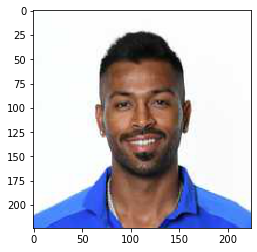

hardik_pandya


In [3]:
pred('./mc.jpg')

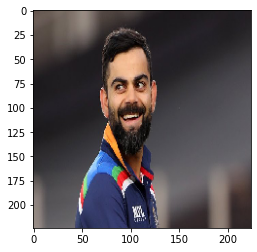

virat_kohli


In [4]:
pred('./virat.jpg')

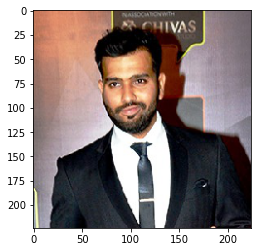

rohit_sharma


In [5]:
pred('./rohit.jpg')

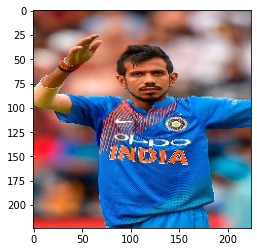

yuzvendra_chahal


In [6]:
pred('./yuzi.jpeg')

In [ ]:
import cv2

camera = cv2.VideoCapture(1)

while True:
    success, img = camera.read()

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    face_cascade = cv2.CascadeClassifier('haarcascade.xml')
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    img2 = img.copy()
    
    for (x,y,w,h) in faces:
        img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        img2 = img2[y-70:y+h+70, x-70:x+w+70]
    try:
        img2 = cv2.resize(img2,(224,244))
        img2rgb = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
        txt = pred2(img2rgb)
        cv2.putText(img, txt,(30,30),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2, cv2.LINE_AA)
    except:
        pass
    cv2.imshow('image',img)
    if cv2.waitKey(1) & 0xFF == ord('t'):
        cv2.destroyAllWindows()
        camera.release()
        break